In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [4]:
data = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/MY_FINAL PROJECT/Train_customer.csv")
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9125 non-null   int64  
 1   Gender           9125 non-null   object 
 2   Ever_Married     8970 non-null   object 
 3   Age              9125 non-null   int64  
 4   Graduated        9041 non-null   object 
 5   Profession       8982 non-null   object 
 6   Work_Experience  8170 non-null   float64
 7   Spending_Score   9125 non-null   object 
 8   Family_Size      8733 non-null   float64
 9   Var_1            9034 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 713.0+ KB


In [6]:
df = data.drop(['ID'], axis = 1)

In [7]:
df.nunique()

Gender              2
Ever_Married        2
Age                67
Graduated           2
Profession          9
Work_Experience    15
Spending_Score      3
Family_Size         9
Var_1               7
dtype: int64

In [8]:
df.describe()

,Age,Work_Experience,Family_Size
count,9125.000000,8170.000000,8733.000000
mean,43.566795,2.635618,2.841292
std,16.798711,3.405982,1.535801
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [9]:
df['Work_Experience'].mode()

0    1.0
dtype: float64

<AxesSubplot:xlabel='Work_Experience', ylabel='Density'>

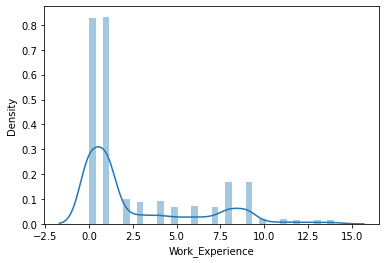

In [10]:
sns.distplot(df['Work_Experience'])

In [11]:
df['Ever_Married'] = df['Ever_Married'].fillna(df['Ever_Married'].mode()[0])

In [12]:
df['Graduated']= df['Graduated'].fillna(df['Graduated'].mode()[0])

In [13]:
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

In [14]:
df['Work_Experience']= df['Work_Experience'].fillna(df['Work_Experience'].mode()[0])

In [15]:
df['Family_Size']= df['Family_Size'].fillna(df['Family_Size'].mode()[0])

In [16]:
df['Var_1'] = df['Var_1'].fillna(df['Var_1'].mode()[0])

<AxesSubplot:>

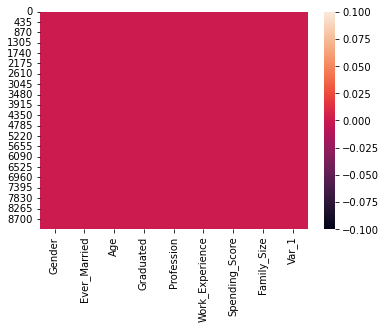

In [17]:
sns.heatmap(df.isnull())

In [18]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9125 non-null   object 
 1   Ever_Married     9125 non-null   object 
 2   Age              9125 non-null   int64  
 3   Graduated        9125 non-null   object 
 4   Profession       9125 non-null   object 
 5   Work_Experience  9125 non-null   float64
 6   Spending_Score   9125 non-null   object 
 7   Family_Size      9125 non-null   float64
 8   Var_1            9125 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 641.7+ KB


In [19]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6


<AxesSubplot:xlabel='Gender', ylabel='count'>

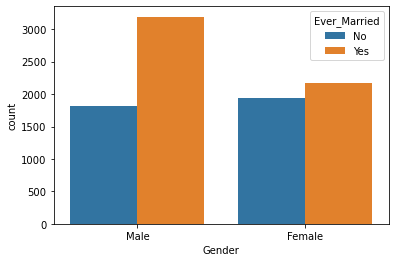

In [20]:
sns.countplot(df['Gender'], hue = df['Ever_Married'])

<AxesSubplot:xlabel='Profession', ylabel='count'>

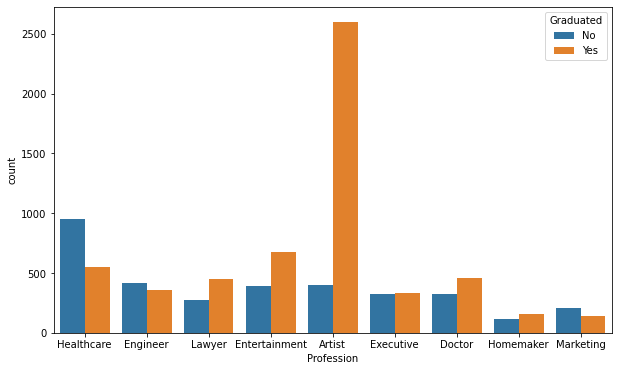

In [21]:
plt.figure(figsize = (10,6))
sns.countplot(df['Profession'], hue = df['Graduated'])

<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

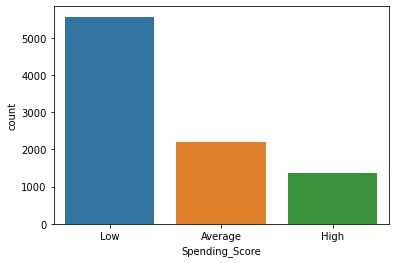

In [22]:
sns.countplot(df['Spending_Score'])

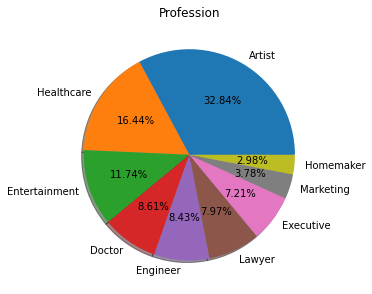

In [23]:
plt.subplot(1,1,1)  
label = df['Profession'].value_counts().index
value = df['Profession'].value_counts().values
plt.pie(value, labels = label,autopct='%1.2f%%', shadow=True, explode=None)
plt.title("Profession")

plt.tight_layout(pad=0.4)

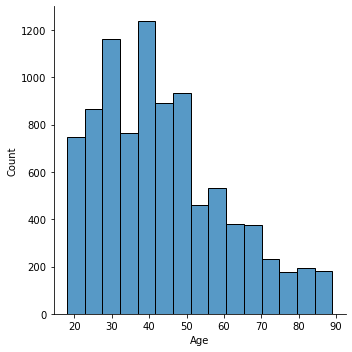

In [24]:
sns.displot(df['Age'], bins = 15)

<AxesSubplot:xlabel='Age'>

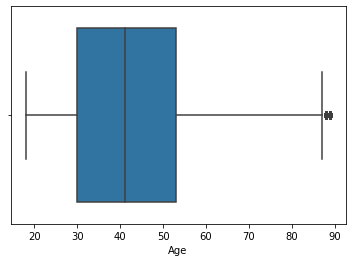

In [25]:
sns.boxplot(df['Age'])

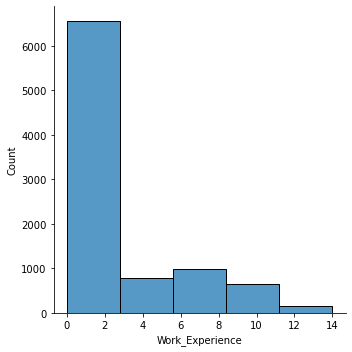

In [26]:
sns.displot(df['Work_Experience'], bins = 5)

In [27]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6


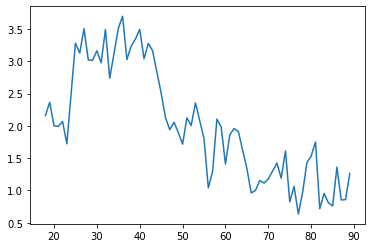

In [28]:
a  = df.groupby('Age').Work_Experience.mean()
plt.plot(a)

<AxesSubplot:>

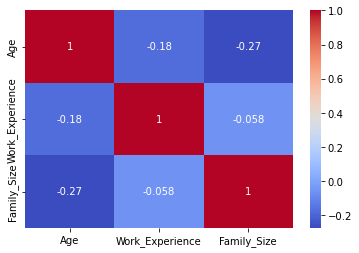

In [29]:
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

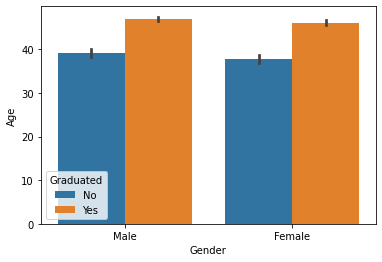

In [30]:
sns.barplot(x= df['Gender'], y = df['Age'], hue = df['Graduated'])

<AxesSubplot:xlabel='Gender', ylabel='Work_Experience'>

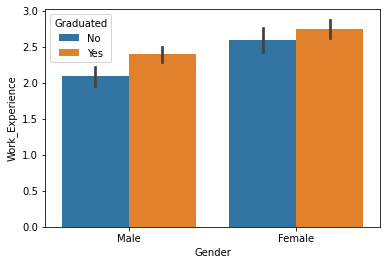

In [31]:
sns.barplot(x= df['Gender'], y = df['Work_Experience'], hue = df['Graduated'])

<AxesSubplot:xlabel='Spending_Score', ylabel='Family_Size'>

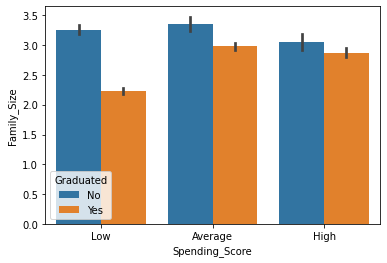

In [32]:
sns.barplot(x= df['Spending_Score'], y = df['Family_Size'], hue = df['Graduated'])

<AxesSubplot:xlabel='Spending_Score', ylabel='Work_Experience'>

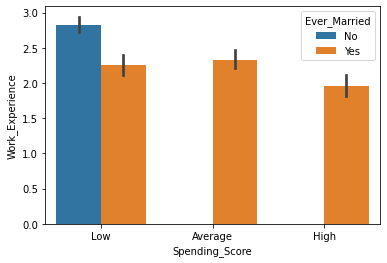

In [34]:
sns.barplot(x= df['Spending_Score'], y = df['Work_Experience'], hue= df['Ever_Married'])

In [35]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6


In [37]:
df['Ever_Married']= df['Ever_Married'].replace({'No':0 , 'Yes':1})

In [38]:
df['Graduated']= df['Graduated'].replace({'No':0 , 'Yes':1})

In [39]:
df['Spending_Score'] = df['Spending_Score'].replace({'Low':0,'Average':1,'High':2})

In [40]:
df.Var_1.unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [42]:
df['Var_1'] = df['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})

In [43]:
df['Gender'] = df['Gender'].replace({'Male':0,'Female':1})

In [44]:
df['Profession'].value_counts()

Artist           2997
Healthcare       1500
Entertainment    1071
Doctor            786
Engineer          769
Lawyer            727
Executive         658
Marketing         345
Homemaker         272
Name: Profession, dtype: int64

In [45]:
df['Profession'] = df['Profession'].replace({'Artist':0,'Healthcare':1,'Entertainment':2,'Engineer':3,'Doctor':4,'Lawyer':5,'Executive':6,'Marketing':7,'Homemaker':8})

In [46]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,0,22,0,1,1.0,0,4.0,4
1,1,1,38,1,3,1.0,1,3.0,4
2,1,1,67,1,3,1.0,0,1.0,6
3,0,1,67,1,5,0.0,2,2.0,6
4,1,1,40,1,2,1.0,2,6.0,6


In [48]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

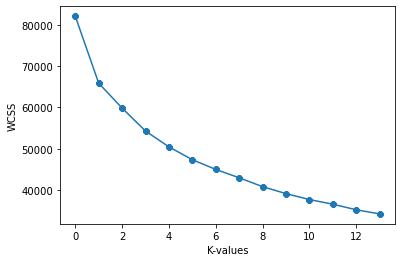

In [49]:
wcss = []
range_values = range(1,15)


for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(wcss, marker = '8')
plt.xlabel('K-values')
plt.ylabel('WCSS')
plt.show()

In [50]:
kmeans = KMeans(4, random_state = 42).fit(df_scaled)

In [51]:
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(4, 9)

In [52]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.300822,-1.166178,-0.347778,0.577608,-0.218778,0.329784,-0.729699,-0.568415,0.187922
1,-0.028047,-0.924983,-0.977192,-1.100655,0.011332,-0.067982,-0.657578,0.782035,-0.453011
2,-0.067949,0.836593,0.237183,0.538253,-0.644388,-0.053167,0.305178,-0.103964,0.083536
3,-0.159967,0.821308,1.001523,-0.239875,1.198242,-0.169166,0.934180,-0.105298,0.163331


In [53]:
cluster_centers = scaler.inverse_transform(cluster_centers)

In [54]:
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.601434,0.014344,37.724898,0.906762,1.808914,3.539959,6.661338e-16,1.945697,5.418033
1,0.437768,0.133047,27.152122,0.095374,2.357654,2.242728,5.340963e-02,3.987601,4.508822
2,0.417910,1.000000,47.550941,0.887735,0.793965,2.291045,7.663855e-01,2.647956,5.269955
3,0.372116,0.992477,60.390171,0.511535,5.188064,1.912738,1.232197e+00,2.645938,5.383149


In [55]:
y_kmeans = kmeans.fit_predict(df_scaled)

In [56]:
df_cluster = pd.concat([df,pd.DataFrame({'Cluster':labels})],axis=1)

df_cluster.head(9)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,0,0,22,0,1,1.0,0,4.0,4,1
1,1,1,38,1,3,1.0,1,3.0,4,2
2,1,1,67,1,3,1.0,0,1.0,6,2
3,0,1,67,1,5,0.0,2,2.0,6,3
4,1,1,40,1,2,1.0,2,6.0,6,2
5,0,1,56,0,0,0.0,1,2.0,6,2
6,0,0,32,1,1,1.0,0,3.0,6,0
7,1,0,33,1,1,1.0,0,3.0,6,0
8,1,1,61,1,3,0.0,0,3.0,7,2


In [57]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-2.25066672,  1.18725021],
       [ 0.62433438,  0.19540444],
       [ 1.35713644, -1.47785023],
       ...,
       [ 1.46978324,  0.75076587],
       [-2.39242844,  1.24604064],
       [-2.38273198,  1.61847844]])

In [58]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.250667,1.187250
1,0.624334,0.195404
2,1.357136,-1.477850
3,2.897506,0.436680
4,1.215228,1.027937


In [59]:
pca_df = pd.concat([pca_df,pd.DataFrame({'Cluster':labels})] ,axis=1)
pca_df.head()

,pca1,pca2,Cluster
0,-2.250667,1.187250,1
1,0.624334,0.195404,2
2,1.357136,-1.477850,2
3,2.897506,0.436680,3
4,1.215228,1.027937,2


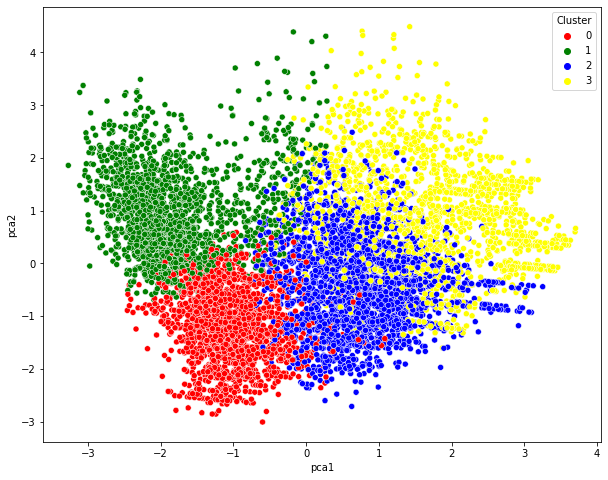

In [60]:
plt.figure(figsize = (10,8))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'Cluster', data = pca_df, palette = ['red','green','blue','yellow'])
plt.show()

In [61]:
df_cluster.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,0,0,22,0,1,1.0,0,4.0,4,1
1,1,1,38,1,3,1.0,1,3.0,4,2
2,1,1,67,1,3,1.0,0,1.0,6,2
3,0,1,67,1,5,0.0,2,2.0,6,3
4,1,1,40,1,2,1.0,2,6.0,6,2


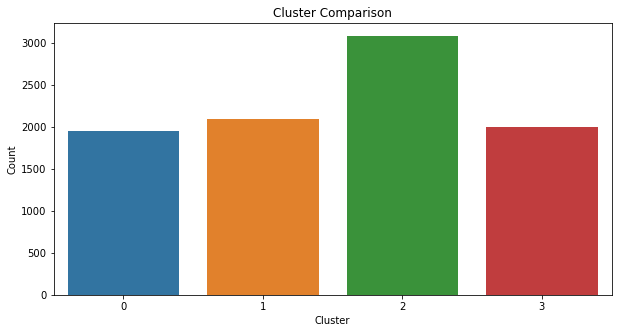

In [62]:
plt.subplots(figsize=(10,5))
sns.countplot(df_cluster['Cluster'].sort_values())
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Comparison')

plt.show()

In [63]:
gender_based = pd.pivot_table(df_cluster, values='Age', index=['Gender'], columns=['Cluster'], aggfunc=np.count_nonzero)
gender_based

Cluster,0,1,2,3
Gender,,,,
0,778,1179,1793,1253
1,1174,918,1287,743


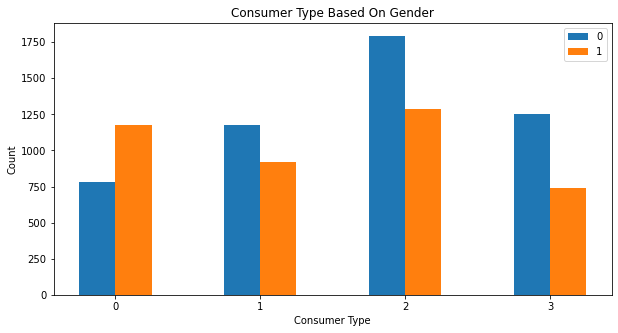

In [64]:
x = np.arange(len(gender_based.columns))
width = 0.25

fig,ax = plt.subplots(figsize = (10,5))
for i in range(len(gender_based)):
    ax.bar(x + (i*width), gender_based.loc[gender_based.index[i]], width=width, label=gender_based.index[i])

ax.set_xticks(x + ((len(gender_based)/2-0.5)*width))
ax.set_xticklabels(gender_based.columns)

plt.title('Consumer Type Based On Gender')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc = 'best', frameon=True)
plt.show()

In [65]:
married_based = pd.pivot_table(df_cluster, values='Age', index=['Ever_Married'], columns=['Cluster'], aggfunc=np.count_nonzero)
married_based

Cluster,0,1,2,3
Ever_Married,,,,
0,1924.0,1818.0,NaN,15.0
1,28.0,279.0,3080.0,1981.0


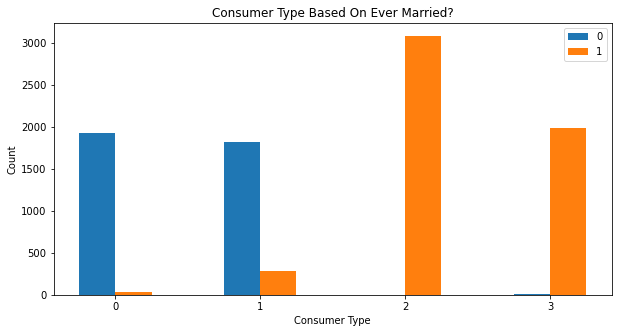

In [66]:
x = np.arange(len(married_based.columns))
width = 0.25

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(married_based)):
    ax.bar(x+(i*width),married_based.loc[married_based.index[i]],width=width, label=married_based.index[i])

ax.set_xticks(x+((len(married_based)/2-0.5)*width))
ax.set_xticklabels(married_based.columns)

plt.title('Consumer Type Based On Ever Married?')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc='best',frameon=True)
plt.show()

In [67]:
age_based = pd.DataFrame(df_cluster.groupby('Cluster')['Age'].mean())
age_based

,Age
Cluster,
0,37.724898
1,27.152122
2,47.555844
3,60.369739


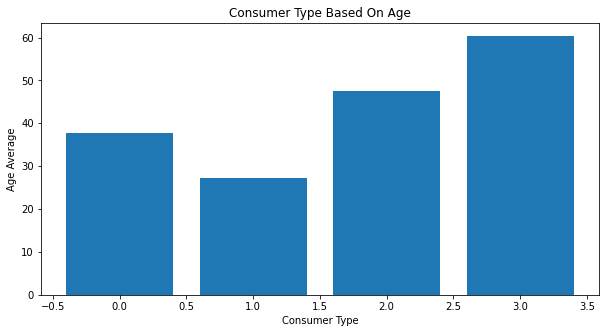

In [68]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(age_based.index,age_based['Age'])

plt.title('Consumer Type Based On Age')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Age Average')
plt.show()


In [69]:
grad_based = pd.pivot_table(df_cluster, values='Age',index=['Graduated'],columns=['Cluster'],aggfunc=np.count_nonzero)
grad_based

Cluster,0,1,2,3
Graduated,,,,
0,182,1897,345,975
1,1770,200,2735,1021


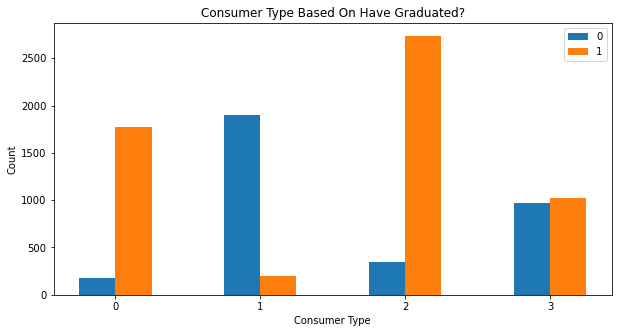

In [70]:
x = np.arange(len(grad_based.columns))
width = 0.25

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(grad_based)):
    ax.bar(x+(i*width),grad_based.loc[grad_based.index[i]],width=width, label=grad_based.index[i])

ax.set_xticks(x+((len(grad_based)/2-0.5)*width))
ax.set_xticklabels(grad_based.columns)

plt.title('Consumer Type Based On Have Graduated?')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc='best',frameon=True)
plt.show()

In [71]:
prof_based = pd.pivot_table(df_cluster,values='Age',index=['Profession'],columns=['Cluster'],aggfunc=np.count_nonzero)
prof_based

Cluster,0,1,2,3
Profession,,,,
0,766.0,163.0,2052.0,16.0
1,362.0,973.0,162.0,3.0
2,268.0,219.0,490.0,94.0
3,161.0,222.0,212.0,174.0
4,201.0,257.0,159.0,169.0
5,35.0,4.0,3.0,685.0
6,12.0,49.0,2.0,595.0
7,77.0,155.0,NaN,113.0
8,70.0,55.0,NaN,147.0


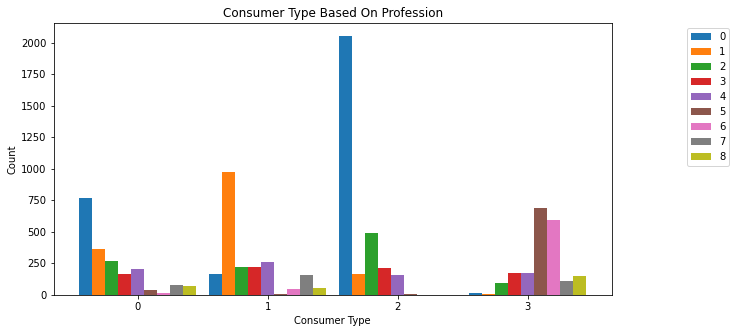

In [72]:
x = np.arange(len(prof_based.columns))
width = 0.1

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(prof_based)):
    ax.bar(x+(i*width),prof_based.loc[prof_based.index[i]],width=width, label=prof_based.index[i])

ax.set_xticks(x+((len(prof_based)/2-0.5)*width))
ax.set_xticklabels(prof_based.columns)

plt.title('Consumer Type Based On Profession')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc='best',bbox_to_anchor=(0.92,0.40,0.3,0.6),frameon=True)
plt.show()

In [73]:
workexp_based = pd.DataFrame(df_cluster.groupby('Cluster')['Work_Experience'].mean())
workexp_based

,Work_Experience
Cluster,
0,3.539959
1,2.242728
2,2.290260
3,1.914329


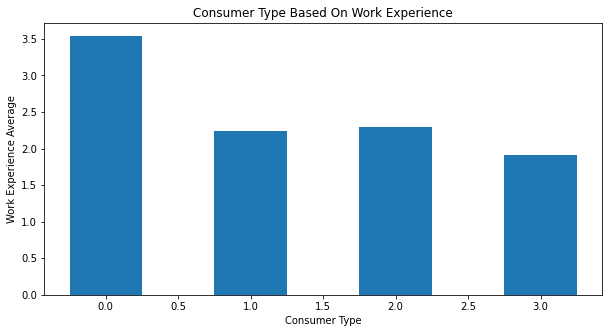

In [74]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(workexp_based.index,workexp_based['Work_Experience'],width=0.5)

plt.title('Consumer Type Based On Work Experience')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Work Experience Average')
plt.show()

In [75]:
spend_based = pd.pivot_table(df_cluster,values='Work_Experience',index=['Spending_Score'],columns=['Cluster'],aggfunc=np.count_nonzero)
spend_based

Cluster,0,1,2,3
Spending_Score,,,,
0,1492.0,1371.0,739.0,356.0
1,NaN,77.0,1184.0,315.0
2,NaN,10.0,254.0,691.0


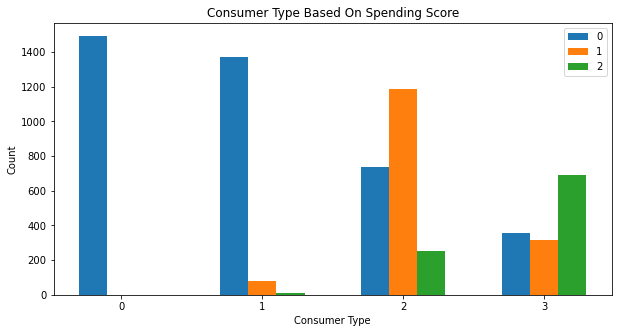

In [76]:
x = np.arange(len(spend_based.columns))
width = 0.2

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(spend_based)):
    ax.bar(x+(i*width),spend_based.loc[spend_based.index[i]],width=width, label=spend_based.index[i])

ax.set_xticks(x+((len(spend_based)/2-0.5)*width))
ax.set_xticklabels(spend_based.columns)

plt.title('Consumer Type Based On Spending Score')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc='best',frameon=True)
plt.show()

In [77]:
famsize_based = pd.DataFrame(df_cluster.groupby('Cluster')['Family_Size'].agg(pd.Series.mode))
famsize_based

,Family_Size
Cluster,
0,1.0
1,4.0
2,2.0
3,2.0


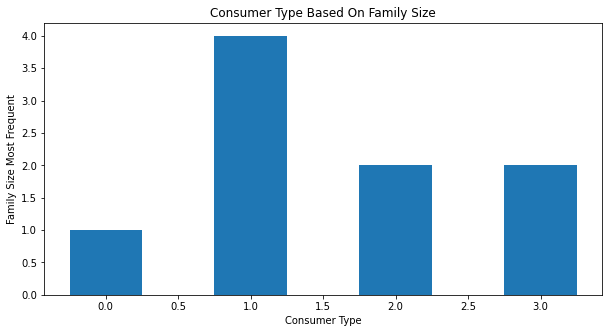

In [78]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(famsize_based.index,famsize_based['Family_Size'],width=0.5)

plt.title('Consumer Type Based On Family Size')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Family Size Most Frequent')
plt.show()